This Notebook will show the co-occurrence matrices that indicate how frequently two expressed genes are clustered together when looking at all the models from the model ensembles. It gives an idea of the level of consistency of the interaction data used to reconstruct the models. In this way, reconstructions that have highly defined communities will arise from interaction data that consistenly gives rise to similar 3D organisations in the modelling approach. Moreover, these plots show communitites of elements that preferentially aggregate close to each other in space.

# Libraries and functions 

In [1]:
import sys
import cPickle as pickle
from matplotlib import pyplot as plt
import warnings

# Parameters to modify 

In [2]:
# Maximum number of models to be used. From ~1500 done, we will keep the best 1000
modelsKeep = 1000
# Base path where the folder branch is stored
basePath = '/home/julen/TADdyn/TADdyn_tutorial/'
# Define the orther of the cells for the ploting
orderCell = ['Ery', 'nCD4', 'Mon']
# Define the coloring options for each cell
colors = [(120/255., 94/255., 240/255.), 
          (254/255., 97/255., 0/255.),
          (220/255., 38/255., 127/255.)
         ]
# Wether to store figures in pdf or not
saveFig = True
# In which of the model clusters we will do the analysis
cluster = 1

# Optinal file with information about expression chip or other measures whose 
# location will be shown in the plots
# Format: Name Chromosome Coordinate Cell1 Cell2, Cell3, ...
# Example: Gene Chr TSS Ery nCD4 Mon  # Each Cell column has the expression value
# Of that cell in the gene that names the row
signalData = basePath + 'additionaInput/expressionData.txt'
# The signal thresshold associated to this files (if none leave it as None which
# will define 0 by default)
# Allowed lowest value is 0
thresshold = 0

# Range of number of clusters in which to look for the optimal clustering
clusterRange=(2,10)

# minimum and maximum values vor the coloring of expression in the 
# cooccurrence matrix borders
colorRange = (0, 5)


# Run 

## Import additional libraries 

In [3]:
sys.path.append(basePath + 'code')
import fileHandling
import plotting
import metrics

## Define new paths 

In [4]:
# Output path for pickles and plots
outdata = basePath + 'outData/modelAnalysis/model_comparisons/coOccurrenceMatrix/'
outplot = basePath + 'outPlot/modelAnalysis/model_comparisons/coOccurrenceMatrix/'

# create folders
! mkdir -p {outdata}
! mkdir -p {outplot}

## Get model files and regions 

In [5]:
## Path were the models are stored
cells, regionsAll, models = fileHandling.getModelsPaths(basePath, ending='models')

## get regions
regiones = {}
# get info of the regions
for cell in cells:
    for regi in regionsAll:
        if not regi in regiones:
            
            regiones[regi] = fileHandling.getREgiInfo(basePath, regi, cell)
        else:
            infot = fileHandling.getREgiInfo(basePath, regi, cell)
            if infot != regiones[regi]:
                print('Region %s, cell %s has different parameters than previous cells')
                print('This code is not prepared to compare models with different length \
                      or resolution')

## Retrieve clustering data 

In [6]:
# If we ran this script with less models, will recover the previous clustering info
clustersPickle= basePath + 'outData/modelAnalysis/clustering/allClusterDict.pickle' 
with open(clustersPickle, "rb") as input_file:
    allClusters = pickle.load(input_file)
print('Recovering previous clustering data from:')
print(clustersPickle)

Recovering previous clustering data from:
/home/julen/TADdyn/TADdyn_tutorial/outData/modelAnalysis/clustering/allClusterDict.pickle


## Load expression data and gene positions

In [7]:
newSignalPos, newSignal = fileHandling.getSignalAndPos(regiones, orderCell, 
                                                       signalData, signalThresshold=0)

## Make the first clustering based on distance

In [8]:
distancesPerModel = metrics.getBetweenBinDist2(regionsAll, models, newSignalPos, modelsKeep,
                      allClusters, cluster)

## Get co-occurrence matrices

In [9]:
# we will hide some warnings taht appear in this part
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # code that produces a warning
    definedClusters, coOcurrMatrices, posConverter = metrics.getCooccurrenceMatrices(regionsAll, models, 
                                                                       distancesPerModel,
                                                               newSignalPos, 
                                                               clusterRange=clusterRange)

In [10]:
# Store distance data in pickle
with open(outdata + "DistancesCooccurrence.pickle", "wb") as output_file:
    pickle.dump([definedClusters, coOcurrMatrices, posConverter], output_file)
    

If you dont want to run all, you can load our results from here

In [ ]:
# Load distance data from pickle
with open(outdata + "DistancesCooccurrence.pickle", "rb") as input_file:
        definedClusters, coOcurrMatrices, posConverter =  pickle.load(input_file)

## Plot the range of automatically defined top number of clusters 

NOTE: Is important to check that the number of automatically assigned clusters doesn't always show the maximum or minimum values

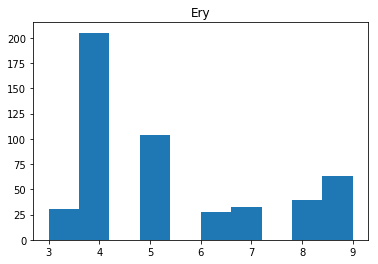

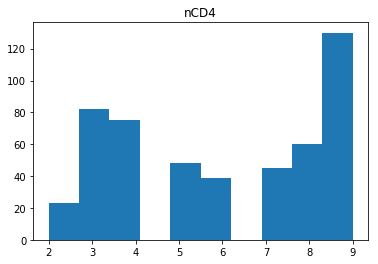

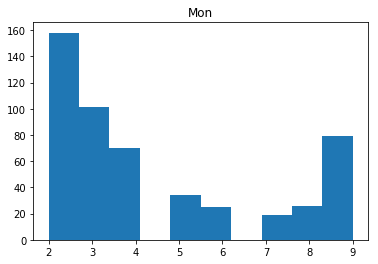

In [11]:
for regi in regionsAll:
    for cell in orderCell:
        plt.hist(definedClusters[regi][cell])
        plt.title(cell)
        plt.show()


## Plot matrices 

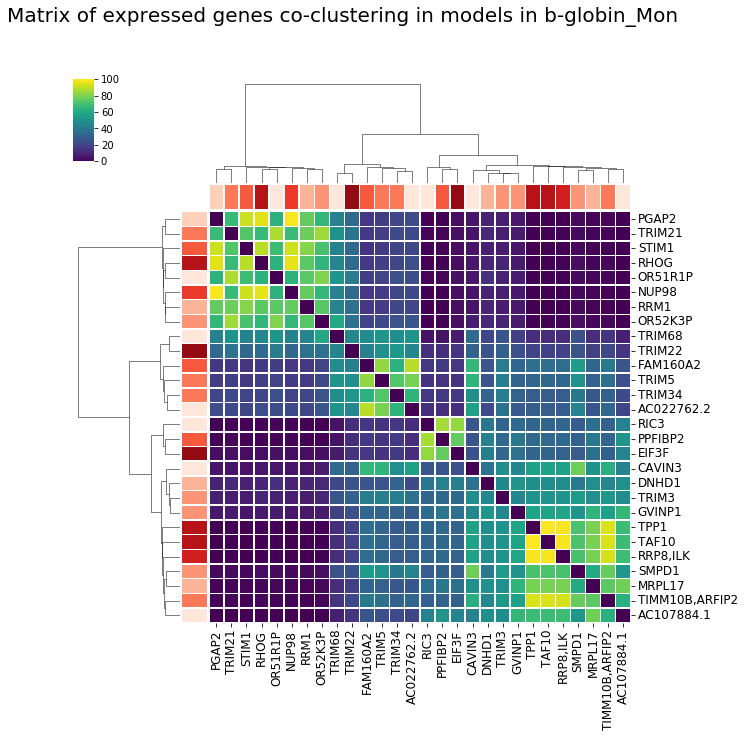

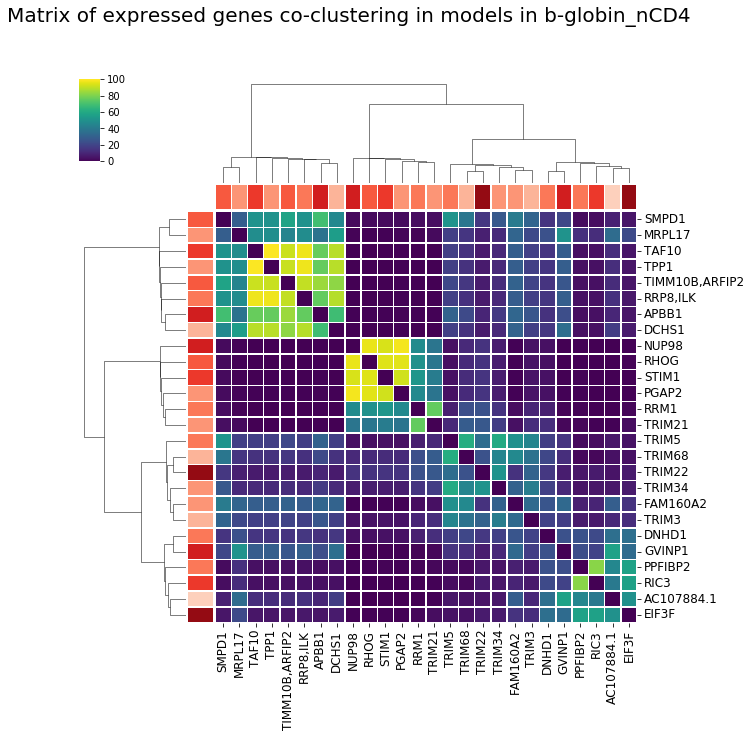

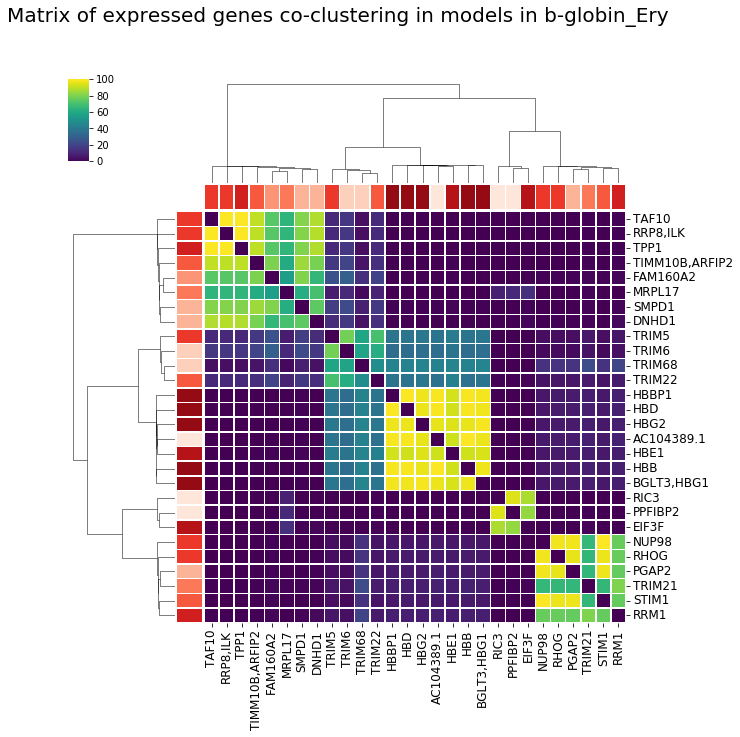

In [12]:
plotting.getCoOccurrencePlot(coOcurrMatrices, colorRange[0], colorRange[1], cluster,
                       newSignalPos, posConverter, newSignal, saveFig, outplot)


## Get clustering of the co-occurrence matrix

In [13]:
clustersBinPos, clusterGeneNames = metrics.getClusterPositions(coOcurrMatrices, posConverter,
                        newSignalPos, toshow=True)

############################## b-globin ##############################
:::::::::: Mon ::::::::::
_____ 1 _____
NUP98
PGAP2
RHOG
STIM1
RRM1
TRIM21
OR51R1P
OR52K3P
_____ 2 _____
TRIM68
TRIM34
TRIM5
TRIM22
AC022762.2
FAM160A2
CAVIN3
SMPD1
TRIM3
TIMM10B
ARFIP2
DNHD1
RRP8
ILK
TAF10
TPP1
MRPL17
GVINP1
AC107884.1
PPFIBP2
EIF3F
RIC3
:::::::::: nCD4 ::::::::::
_____ 1 _____
SMPD1
APBB1
TIMM10B
ARFIP2
RRP8
ILK
TAF10
TPP1
DCHS1
MRPL17
_____ 2 _____
NUP98
PGAP2
RHOG
STIM1
RRM1
TRIM21
_____ 3 _____
TRIM68
TRIM34
TRIM5
TRIM22
FAM160A2
TRIM3
DNHD1
GVINP1
AC107884.1
PPFIBP2
EIF3F
RIC3
:::::::::: Ery ::::::::::
_____ 1 _____
FAM160A2
SMPD1
TIMM10B
ARFIP2
DNHD1
RRP8
ILK
TAF10
TPP1
MRPL17
_____ 2 _____
TRIM68
AC104389.1
HBB
HBD
HBBP1
BGLT3
HBG1
HBG2
HBE1
TRIM6
TRIM5
TRIM22
_____ 3 _____
PPFIBP2
EIF3F
RIC3
_____ 4 _____
NUP98
PGAP2
RHOG
STIM1
RRM1
TRIM21


## Store data

In [14]:
with open(outdata + 'coOccurrenceClusters', 'wb') as handle:
    pickle.dump([clustersBinPos, clusterGeneNames], handle, protocol=pickle.HIGHEST_PROTOCOL)